# WITH PANDAS AND MATPLOTLIB

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline


INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [2]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

In [3]:
kill.sample(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
238,264,Robert Rooker,29/03/15,shot,vehicle,26.0,M,W,Jasper,OH,False,attack,Car,False
1688,1895,Robert Young,17/09/16,shot,toy weapon,45.0,M,W,Huntsville,AL,False,attack,Other,True
1063,1221,Charles M. Smith,30/01/16,shot,gun,29.0,M,B,Chicago,IL,False,attack,Not fleeing,False
1608,1797,Chad Irwin,18/08/16,shot,knife,40.0,M,W,Antelope,CA,False,other,Not fleeing,False
638,771,Julian Hoffman,23/08/15,shot,toy weapon,21.0,M,W,Brick Township,NJ,False,attack,Not fleeing,False


## 1: Plot number of people by gender

In [4]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

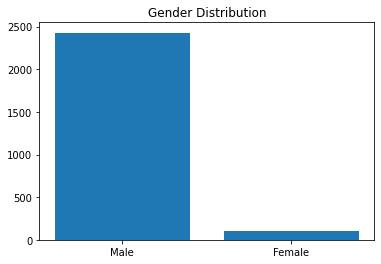

In [5]:
data={"Male":kill[kill["gender"] == "M"]["id"].count(),"Female":kill[kill["gender"] == "F"]["id"].count()}
keys = data.keys()
values = data.values()

fig = plt.figure(figsize = (6,4))
plt.title("Gender Distribution")

plt.bar(keys,values);

## 2: Plot 7 most common kill weapons

In [6]:
kill["armed"].value_counts(dropna = False).head(7)

gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
unknown weapon      18
Name: armed, dtype: int64

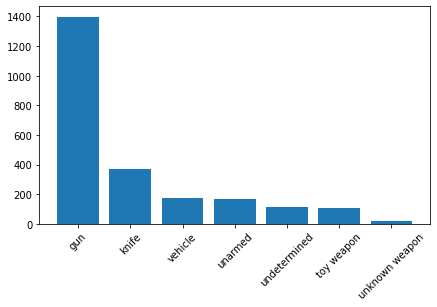

In [7]:
fig = plt.figure(figsize = (7,4))

values = kill["armed"].value_counts(dropna = False).head(7)
keys = kill["armed"].value_counts(dropna = False).head(7).index

plt.bar(keys,values)
plt.xticks(rotation = 45);

## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

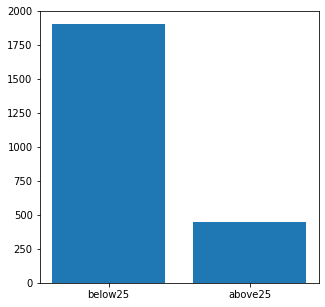

In [8]:
fig2 = plt.figure(figsize = (5,5))

plt.bar(["below25","above25"],[kill[kill["age"] > 25].shape[0],kill[kill["age"] < 25].shape[0]]);  #first method

In [9]:
kill["age_cat"] = kill["age"].transform(lambda x : "above25" if x > 25 else "below25") #second method

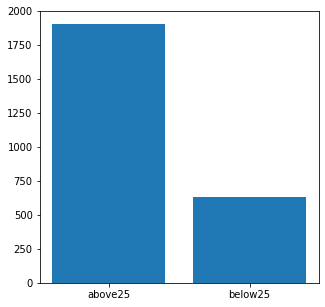

In [10]:
fig2 = plt.figure(figsize = (5,5))

plt.bar(kill.age_cat.value_counts().index,kill.age_cat.value_counts().values);

## 4: Plot number of killed poeple by race

{'W': 1168, 'B': 592, 'H': 401, 'A': 36, 'N': 29, 'O': 28}

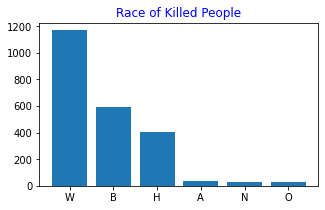

In [19]:

fig = plt.figure(figsize = (5,3) )

race = dict(kill["race"].value_counts())
plt.bar(race.keys(),race.values())
plt.title("Race of Killed People",fontdict={"color":"b"});
race

## 5: Killed People According to Races (Pie Chart)

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [12]:
kill.dropna(inplace = True)
kill.shape

(2254, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [13]:
kill["race"].value_counts()

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [14]:
kill["race"].value_counts().index

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [15]:
kill["race"].value_counts().values

array([1168,  592,  401,   36,   29,   28], dtype=int64)

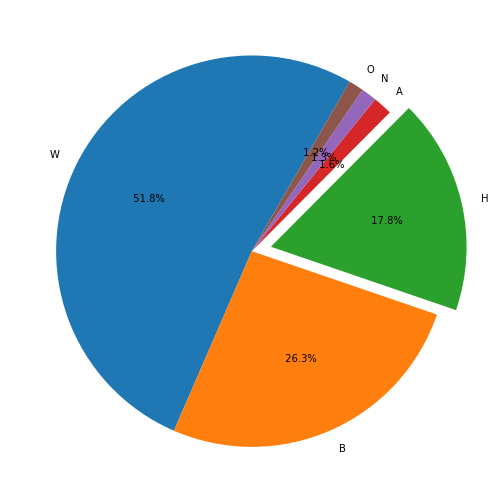

In [33]:
# matplotlib
fig = plt.figure(figsize = (9,9))
expl = [0,0,0.1,0,0,0]

plt.pie(x=kill["race"].value_counts().values,labels = kill['race'].value_counts().index,startangle = 60,explode = expl,autopct = "% .1f%%");
